# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


# Load Data

In [2]:
data = pd.read_csv('1.04.+Real-life+example.csv')
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Data Cleaning

# #drop

In [3]:
data_cleaning1 = data.drop(['Model'], axis = 1)
data_cleaning1.describe(include = 'all')
# Menghapus variable Model karena dianggap tidak bisa untuk melakukan regresi karena data terlalu banyak
# Variabel Model memiliki unique terlalu banyak sehingga dummy juga akan banyak

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [4]:
data_cleaning1.isnull().sum()
data_cleaning2 = data_cleaning1.dropna(axis = 0)
data_cleaning2.describe(include = 'all')
## Menghapus data yang missing, yaitu pada Price dan EngineV

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# #cek PDF

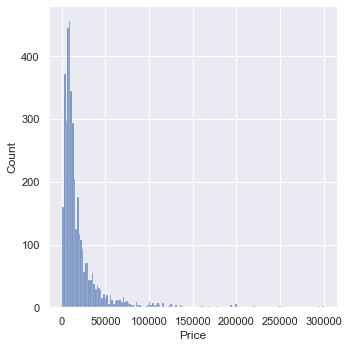

In [5]:
sns.displot(data_cleaning2['Price'])
# Pada PDF untuk Price terdapat anomali, yaitu terdapat Price yang outliers sehingga perlu dihilangkan

In [6]:
q = data_cleaning2['Price'].quantile(0.99)
data_cleaning3 = data_cleaning2[data_cleaning2['Price'] < q]
data_cleaning3.describe(include = 'all')
# Ketika melihat data yang terdapat anomali pada Price, memutuskan untuk menghapus data yang outliers
# Data tersebut adalah data yang lebih dari quartil 99% (referensi dapat 95% atau 99%) atau dapat menghapus 0,5% atau 1%

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


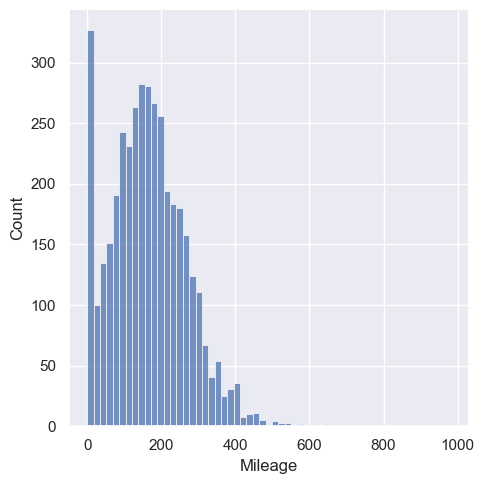

In [7]:
sns.displot(data_cleaning3['Mileage'])
# Pada PDF untuk Mileage terdapat anomali, yaitu terdapat Mileage yang outliers sehingga perlu dihilangkan

In [8]:
q = data_cleaning3['Mileage'].quantile(0.99)
data_cleaning4 = data_cleaning3[data_cleaning3['Mileage'] < q]
data_cleaning4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


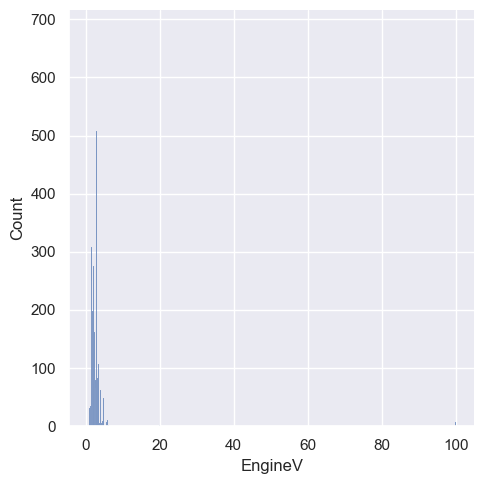

In [9]:
sns.displot(data_cleaning4['EngineV'])
# Pada PDF untuk EngineV terdapat anomali, yaitu terdapat EngineV yang outliers yang berniali aneh sehingga perlu dihilangkan

In [10]:
data_cleaning4.loc[:, ['EngineV']]

,EngineV
0,2.0
1,2.9
2,5.0
3,4.2
4,2.0
...,...
4339,1.6
4340,3.0
4341,3.5
4342,2.0


In [11]:
data_cleaning5 = data_cleaning4[data_cleaning4['EngineV'] < 6.5]
data_cleaning5.describe(include = 'all')
# Menghilangkan nilai yang aneh pada EngineV dengan menyisikan nilai kurang dari 6,5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


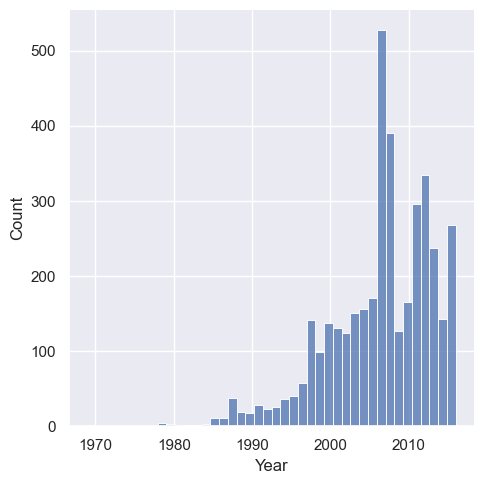

In [12]:
sns.displot(data_cleaning5['Year'])
# Pada PDF untuk Year terdapat anomali, yaitu terdapat Year yang outliers yang berniali aneh sehingga perlu dihilangkan

In [13]:
q = data_cleaning5['Year'].quantile(0.01)
data_cleaning6 = data_cleaning5[data_cleaning5['Year'] > q]
data_cleaning6.describe(include = 'all')
# Ketika melihat data yang terdapat anomali pada Year, memutuskan untuk menghapus data yang outliers
# Data tersebut adalah data yang lebih dari quartil 1% (referensi dapat 95% atau 99%) atau dapat menghapus 0,5% atau 1%

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [14]:
data_cleaned = data_cleaning6.reset_index(drop = True)
data_cleaned.describe(include = 'all')
# Setelah data cleaning merasa sudah beres langkah selanjutnya adalah reset index karena index masih belum urut

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Cek OLS Assumptions

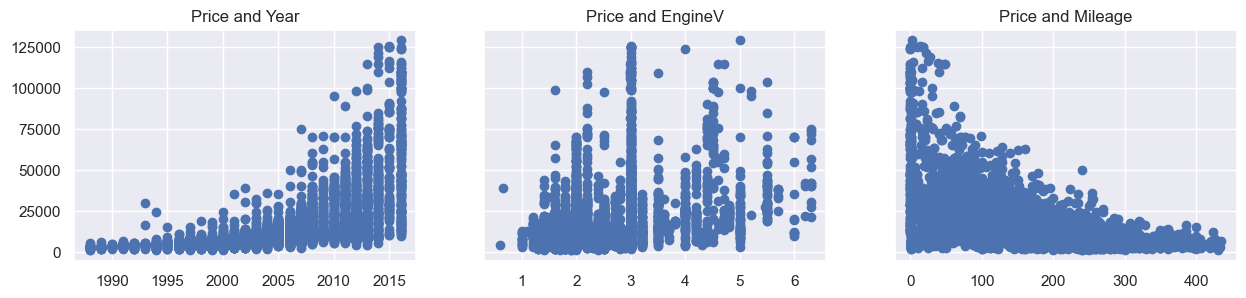

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],  data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()
# Setelah data cleaning selesai langkah selanjutnya adalah cek OLS Assumptions yang terdiri dari 5 kriteria
# OLS Assumptions terdiri dari : Linearity, No Endogeneity, Normal and Homoscedasticity, No Autocorellation, No Multicollinearity
# Periksa dengan seksama dengan 5 OLS Assumptions sehinnga dapat melakukan regresi dengan baik

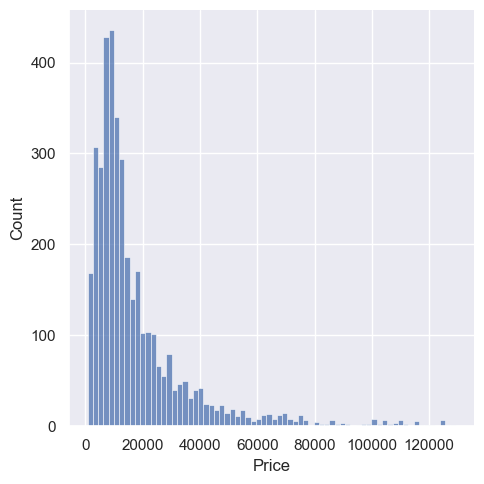

In [16]:
sns.displot(data_cleaned['Price'])
# Kita dapat melihat dengan jelas bahwa Price memiliki bentuk grafik eksponensial
# Agar memudahkan dalam melakukan regresi kita menggunakan LOG TRANSFORM
# Ini akan memperbarui bentuk grafik menjadi bentuk linear

In [17]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned
# Melakukan LOG TRANFORM untuk memperbarui bentuk grafik ke linear 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


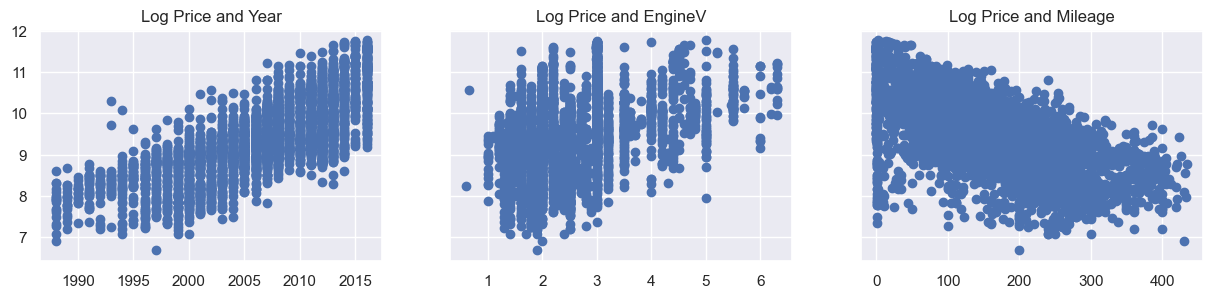

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()
# Grafik terbaru menampilkan adanya regresi
# Garis berikut sudah menampilkan linearity, No Endogeneity (cek dengan konsep), Normality and homoscedasticity, No Autocorellation
# Tetapi kita belum menentukan Multicollinearity

In [19]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned
# Setelah memperbarui data di data_cleaned dengan penambahan log_price, kita harus menghapus price (data lama)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [20]:
data_cleaned.columns.values
# Menentukan Multicollinearity (apakah ada hubungan antara variable independen numerik individu)
# Jika ada variabel independen numberik yang berhubungan makan akan terjadi kesalahan

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import libraries
variables = data_cleaned[['Mileage','Year','EngineV']]
# Cek variable apa yang ingin di cek
vif = pd.DataFrame()
# Membuat tabel vif
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Fungi menggunakan VIF
vif["Features"] = variables.columns
# Menambah kolom Features dan memasukkan isinya
vif
# Nilai VIF yang aman sebaiknya kita menggunakan kurang dari 5
# Sehingga kita menghapus kolom Year
# Kita tidak menghapus EngineV walaupun nilainya cukup tinggi karena jika kita sudah menghapus Year, nilai VIF EngineV akan turun

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [22]:
data_cleanedNumeric = data_cleaned.drop(['Year'], axis = 1)
data_cleanedNumeric
# Kita sudah selesai memeriksa data numberik dengan OLS Asummptions
# Langkah selanjutnya kita melakukan data dummy untuk data kategorikal

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [23]:
data_with_dummies = pd.get_dummies(data_cleanedNumeric, drop_first = True)
data_with_dummies.head()
# Dalam regresi, data kategorikal menggunakan teknik dummies
# Menggunakan method get_dummies
# Sangat penting untuk menghapus satu kolom dummies karena jika tidak dihapus akan menyebabkan Multicollenearity

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [24]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [25]:
new_columns = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
# Urutan yang paling tepat adalah : Dependen, Independen numeric, Dummies

In [26]:
data_preprocessed = data_with_dummies[new_columns]
data_preprocessed.head()
# Memperbarui data dan kolom

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

In [28]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)
# Tentukan target dan input
# Target adalah log_price
# Input adalah variabel selain log_price

In [31]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(inputs)
# Melakukan standarisasi terhadap Mean dan Standar Deviasi agar lebih baik

StandardScaler()

In [32]:
input_scaled = Scaler.transform(inputs)
# Prosedur skala yang sebenarnya

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 1)
# Pisahkan train dan testing 80:20 dengan random_state 1

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
# Melakukan regresi dengan scaled train inputs dan targets

LinearRegression()

In [38]:
y_hat = reg.predict(x_train)
# Melakukan prediksi tehadap nilai yang diamati, yaitu x_train

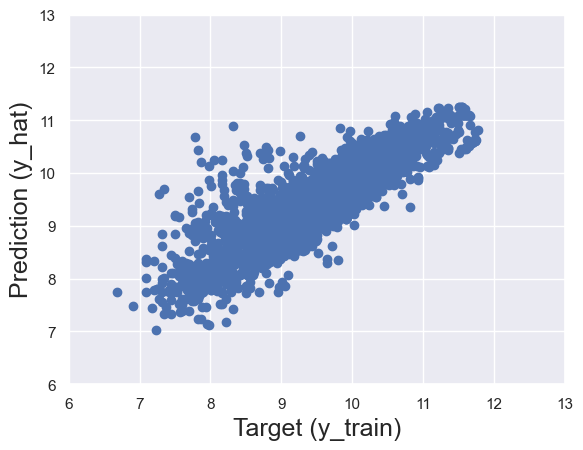

In [50]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Prediction (y_hat)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()
# Membandingkan target (y_trim) dan prediksi (y_hat) menggunakan scatter plot
# Semakin dekat dengan garis XY 45 derajad maka semakin baik prediksinya
# Sumbu X dan Y harus memiliki nilai yang sama (6, 13)


Text(0.5, 1.0, 'Residual PDF')

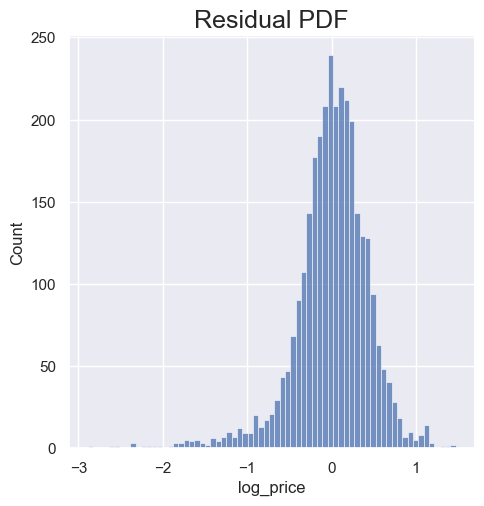

In [43]:
sns.displot(y_train - y_hat)
plt.title('Residual PDF', size = 18)
# Pemeriksaan lainya untuk menilai prediksi adalah menggunakan Residual, yaitu target - prediksi
# Prediksi dikatakan baik jika PDF terdistribusi normal (Mean = 0)
# Tetapi ini cenderung ke negatif karena mungkin prediksi memiliki nilai yang lebih besar dari target

In [44]:
reg.intercept_
# Mencari intercept atau nilai bias

9.41300896059139

In [45]:
reg.coef_
# Mencari coef atau weights

array([-0.45200303,  0.20862879,  0.01457049,  0.01191086, -0.13670226,
       -0.1795674 , -0.05210005, -0.08672276, -0.1477278 , -0.10494319,
       -0.19856314, -0.12948012, -0.17301821, -0.1264255 , -0.02861559,
       -0.15061999,  0.31720349])

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
# Positif weights adalah jika adanya kenaikan sama antara log_price dan variable lainnya
# Contoh positif weight : log_price - EngineV (jika engineV semakin tinggi maka harga juga tinggi)
# Negatif weights adalah jika adanya nilai terbalik dengan log_price
# Contoh negatif weights : log_price - Mileage (jika mileage semakin jauh maka harga mobil semakin murah)
# UNTUK DUMMIES
# Positif weights adalah jika variable kategorikal lebih tinggi dari pada benchmark atau nilai patok (Audi)
# Negatif weights adalah jika variable kategorikal lebih murah dari pada benchmark atau nilai patok (Audi)

,Features,Weights
0,Mileage,-0.452003
1,EngineV,0.208629
2,Brand_BMW,0.014570
3,Brand_Mercedes-Benz,0.011911
4,Brand_Mitsubishi,-0.136702
5,Brand_Renault,-0.179567
6,Brand_Toyota,-0.052100
7,Brand_Volkswagen,-0.086723
8,Body_hatch,-0.147728
9,Body_other,-0.104943


In [47]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [49]:
y_hat_test = reg.predict(x_test)
# Setelah melakukan penyempurnaan dan trained data selanjutnya adalah testing
# Testing dilakukan dengan data yang belum sama sekali pada algoritma yang pernah di trained
# input x_test dan output y_test
# Jika dalam testing prediksi melesat, berarti terjadi OVERFITTED

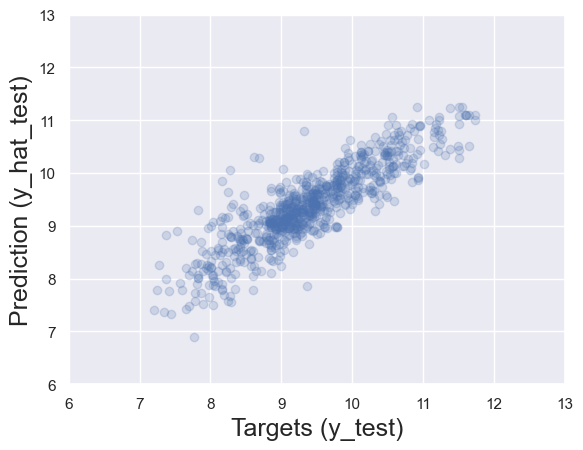

In [54]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Prediction (y_hat_test)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()
# Semakin jenuh warna maka semakin tinggi titik konsentrasi
# Semakin pucat warna maka semakin rendah titik konsentrasi

In [55]:
manual_prediction = pd.DataFrame(y_hat_test, columns = ['Predictions'])
manual_prediction.head()
# Melakukan prediksi secara manual, tetapi harga belum dikembalikan ke bentuk semula atau masih dalam log
# Sehinggga kita menggunakan kembali exponensial


,Predictions
0,9.461582
1,8.065603
2,9.389652
3,8.551536
4,8.980934


In [61]:
manual_prediction = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
manual_prediction.head()

,Predictions
0,12856.212193
1,3183.075661
2,11963.935886
3,5174.695930
4,7950.055496


In [63]:
manual_prediction['Target'] = np.exp(y_test)
manual_prediction.head()
# Membandingkan dengan nilai prediksi dan nilai target, tetapi terdapat error
# Error karena index tidak sama

,Predictions,Target
0,12856.212193,NaN
1,3183.075661,NaN
2,11963.935886,NaN
3,5174.695930,23000.0
4,7950.055496,18300.0


In [64]:
y_test = y_test.reset_index(drop = True)
y_test.head()
# Index telah diperbarui

0    9.210340
1    8.039157
2    9.011889
3    8.575462
4    9.011889
Name: log_price, dtype: float64

In [66]:
manual_prediction['Target'] = np.exp(y_test)
manual_prediction

,Predictions,Target
0,12856.212193,10000.00
1,3183.075661,3100.00
2,11963.935886,8200.00
3,5174.695930,5300.00
4,7950.055496,8200.00
...,...,...
769,18532.349188,13300.95
770,3960.232522,2600.00
771,7925.345258,3500.00
772,10840.826677,2500.00


In [68]:
manual_prediction['Residual'] = manual_prediction['Target'] - manual_prediction['Predictions']
manual_prediction

,Predictions,Target,Residual
0,12856.212193,10000.00,-2856.212193
1,3183.075661,3100.00,-83.075661
2,11963.935886,8200.00,-3763.935886
3,5174.695930,5300.00,125.304070
4,7950.055496,8200.00,249.944504
...,...,...,...
769,18532.349188,13300.95,-5231.399188
770,3960.232522,2600.00,-1360.232522
771,7925.345258,3500.00,-4425.345258
772,10840.826677,2500.00,-8340.826677


In [69]:
manual_prediction['Defference%'] = np.absolute(manual_prediction['Residual']/manual_prediction['Target']*100)
manual_prediction
# OLS sebagai basik yang meminimalkan SSE atau residual

,Predictions,Target,Residual,Defference%
0,12856.212193,10000.00,-2856.212193,28.562122
1,3183.075661,3100.00,-83.075661,2.679860
2,11963.935886,8200.00,-3763.935886,45.901657
3,5174.695930,5300.00,125.304070,2.364228
4,7950.055496,8200.00,249.944504,3.048104
...,...,...,...,...
769,18532.349188,13300.95,-5231.399188,39.331019
770,3960.232522,2600.00,-1360.232522,52.316635
771,7925.345258,3500.00,-4425.345258,126.438436
772,10840.826677,2500.00,-8340.826677,333.633067


In [70]:
manual_prediction.describe()

,Predictions,Target,Residual,Defference%
count,774.000000,774.000000,774.000000,774.000000
mean,15588.284961,17829.164470,2240.879509,34.733783
std,12854.477502,19197.466739,10612.802532,48.094590
min,988.146064,1350.000000,-37977.950694,0.043926
25%,7789.436897,7000.000000,-2096.180124,10.606456
50%,11565.008443,11000.000000,125.705740,23.641237
75%,19067.389782,20777.812500,3113.728832,42.091317
max,77201.800186,124999.000000,78535.390902,495.980076


In [72]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Untuk melihat semua data dan memperjelas data set dengan 2 digit setelah titik
manual_prediction.sort_values(by=['Defference%'])
# Mengurutkan berdasarkan Difference%

,Predictions,Target,Residual,Defference%
73,7503.29,7500.00,-3.29,0.04
16,12490.63,12500.00,9.37,0.07
95,10565.21,10600.00,34.79,0.33
68,15050.00,15000.00,-50.00,0.33
617,18237.05,18300.00,62.95,0.34
460,17417.67,17500.00,82.33,0.47
642,7949.30,7900.00,-49.30,0.62
734,8739.24,8800.00,60.76,0.69
366,42227.76,41900.00,-327.76,0.78
191,13020.24,12900.00,-120.24,0.93
